In [21]:
from typing import Tuple
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from nptyping import NDArray

"""
WRITE THIS FUNCTION
"""
def value_iteration(
    V0: NDArray,
    lr: float,
    gamma:float,
    epsilon: float=1e-12
) -> NDArray:
    diff = [float('inf')] *22
    while any(x > epsilon for x in diff):
        for s in range(22):
            next_val = 0
            for card in range(1,11,1):
                if s+card > 21:
                    break
                else:
                    if card != 10:
                        next_val += 1/13*(lr+gamma*V0[s+card])
                    else:
                        next_val += 4/13*(lr+gamma*V0[s+card])
            v_i_plus1 = max(next_val,s)
            diff[s] = abs(v_i_plus1-V0[s])
            V0[s] = v_i_plus1

    return V0

In [22]:
"""
WRITE THIS FUNCTION
"""
def value_to_policy(V: NDArray, lr: float, gamma: float) -> NDArray:
    actions = np.zeros(V.size)
    for s in range(22):
        next_val = 0
        for card in range(1,11,1):
            if s+card > 21:
                break
            else:
                if card != 10:
                    next_val += 1/13*(lr+gamma*V[s+card])
                else:
                    next_val += 4/13*(lr+gamma*V[s+card])

        actions[s] = 1 if next_val>s else 0
    return actions

Text(0.5, 0.98, 'lr = 0 and γ = 1')

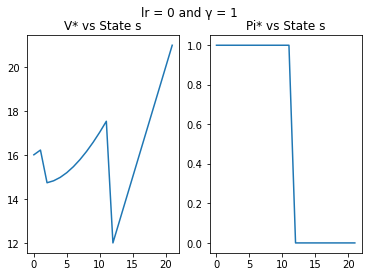

In [34]:
v_zero = np.zeros(22)
v_result = value_iteration(V0=v_zero,lr=0,gamma=1)
actions = value_to_policy(V=v_result,lr=0,gamma=1)
plt.subplot(1,2,1)
plt.plot(v_result)
plt.title('V* vs State s')

plt.subplot(1,2,2)
plt.plot(actions)
plt.title('Pi* vs State s')

plt.suptitle('lr = 0 and γ = 1')

Text(0.5, 0.98, 'lr = 0 and γ = 0.6')

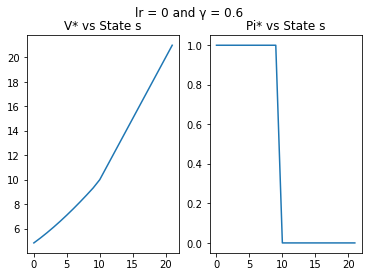

In [40]:
v_zero = np.zeros(22)
v_result = value_iteration(V0=v_zero,lr=0,gamma=0.6)
actions = value_to_policy(V=v_result,lr=0,gamma=0.6)
plt.subplot(1,2,1)
plt.plot(v_result)
plt.title('V* vs State s')

plt.subplot(1,2,2)
plt.plot(actions)
plt.title('Pi* vs State s')

plt.suptitle('lr = 0 and γ = 0.6')

Text(0.5, 0.98, 'lr = -2 and γ = 1')

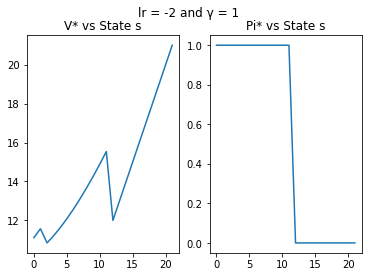

In [55]:
v_zero = np.zeros(22)
v_result = value_iteration(V0=v_zero,lr=-2,gamma=1)
actions = value_to_policy(V=v_result,lr=-2,gamma=1)
plt.subplot(1,2,1)
plt.plot(v_result)
plt.title('V* vs State s')

plt.subplot(1,2,2)
plt.plot(actions)
plt.title('Pi* vs State s')

plt.suptitle('lr = -2 and γ = 1')

Text(0.5, 0.98, 'lr = 2 and γ = 1')

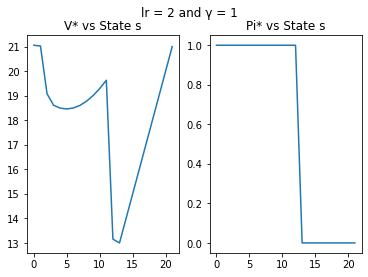

In [57]:
v_zero = np.zeros(22)
v_result = value_iteration(V0=v_zero,lr=2,gamma=1)
actions = value_to_policy(V=v_result,lr=2,gamma=1)
plt.subplot(1,2,1)
plt.plot(v_result)
plt.title('V* vs State s')

plt.subplot(1,2,2)
plt.plot(actions)
plt.title('Pi* vs State s')

plt.suptitle('lr = 2 and γ = 1')

Text(0.5, 0.98, 'lr = -7 and γ = 1')

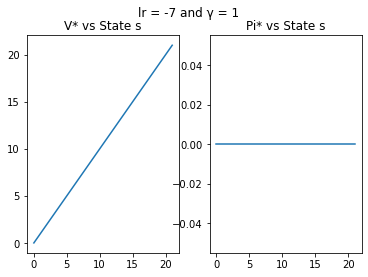

In [65]:
v_zero = np.zeros(22)
v_result = value_iteration(V0=v_zero,lr=-7,gamma=1)
actions = value_to_policy(V=v_result,lr=-7,gamma=1)
plt.subplot(1,2,1)
plt.plot(v_result)
plt.title('V* vs State s')

plt.subplot(1,2,2)
plt.plot(actions)
plt.title('Pi* vs State s')

plt.suptitle('lr = -7 and γ = 1')

Text(0.5, 0.98, 'lr = 240 and γ = 1')

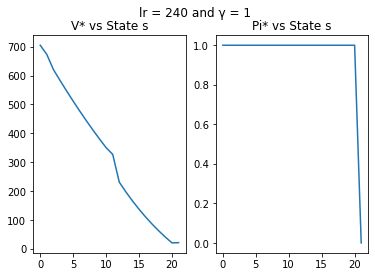

In [84]:
v_zero = np.zeros(22)
v_result = value_iteration(V0=v_zero,lr=240,gamma=1)
actions = value_to_policy(V=v_result,lr=240,gamma=1)
plt.subplot(1,2,1)
plt.plot(v_result)
plt.title('V* vs State s')

plt.subplot(1,2,2)
plt.plot(actions)
plt.title('Pi* vs State s')

plt.suptitle('lr = 240 and γ = 1')

In [98]:
def draw() -> int:
    probs = 1/13*np.ones(10)
    probs[-1] *= 4
    return np.random.choice(np.arange(1,11), p=probs)


"""
WRITE THIS FUNCTION
"""
def Qlearn(
        Q0: NDArray,
        lr: float,
        gamma: float,
        alpha: float,
        epsilon: float,
        N: int
) -> Tuple[NDArray, NDArray]:
    import random
    record = np.zeros((N,3))
    s = 0
    s_prime = None
    reward = None
    for i in range(N):
        if Q0[s][0]==0 and Q0[s][1] == 0:
            a = 1 if random.random()>0.5 else 0
        else:
            a = np.argmax(Q0[s]) if random.random()<(1-epsilon+epsilon/2) else np.argmin(Q0[s])
        if a == 0:
            Q0[s][a] = Q0[s][a] + alpha*(s - Q0[s][a])
            s_prime = 0
            reward = s
        elif a == 1:
            card = draw()
            if s+card >21:
                Q0[s][a] = Q0[s][a] + alpha*(0 - Q0[s][a])
                s_prime = 0
                reward = 0
            else:
                Q0[s][a] = Q0[s][a] + alpha*(lr + gamma*np.max(Q0[s+card]) - Q0[s][a])
                s_prime = s + card
                reward = lr

        record[i][0]=s
        record[i][1]=a
        record[i][2]= reward
        s = s_prime

    return Q0, record

In [113]:
def RL_analysis():
    lr, gamma, alpha, epsilon, N = 0, 1, 0.1, 0.1, 10000
    visits = np.zeros((22,6))
    rewards = np.zeros((N,6))
    values = np.zeros((22,6))

    for i in range(6):
        _, record = Qlearn(np.zeros((22,2)), lr, gamma, alpha, epsilon, 10000*i)
        vals, counts = np.unique(record[:,0], return_counts=True)
        visits[vals.astype(int),i] = counts
        _, record = Qlearn(np.zeros((22,2)), lr, gamma, alpha, 0.2*i, N)
        rewards[:,i] = record[:,2]
        vals, _ = Qlearn(np.zeros((22,2)), lr, gamma, min(0.2*i+0.1,1), epsilon, N)
        values[:,i] = np.max(vals, axis=1)

    plt.figure()
    plt.plot(visits)
    plt.legend(['N=0', 'N=10k', 'N=20k', 'N=30k' ,'N=40k', 'N=50k'])
    plt.title('Number of visits to each state')

    plt.figure()
    plt.plot(np.cumsum(rewards, axis=0))
    plt.legend(['e=0.0', 'e=0.2', 'e=0.4' ,'e=0.6', 'e=0.8', 'e=1.0'])
    plt.title('Cumulative rewards received')

    plt.figure()
    plt.plot(values)
    plt.legend(['a=0.1' ,'a=0.3', 'a=0.5', 'a=0.7', 'a=0.9', 'a=1.0'])
    plt.title('Estimated state values')

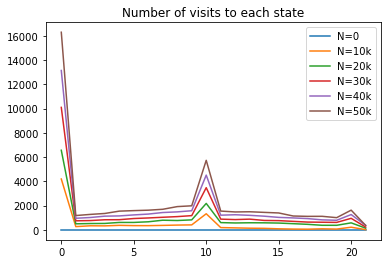

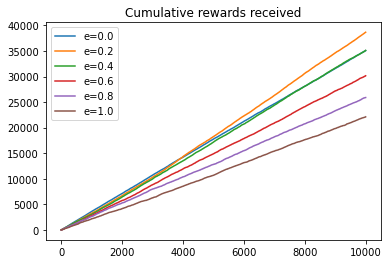

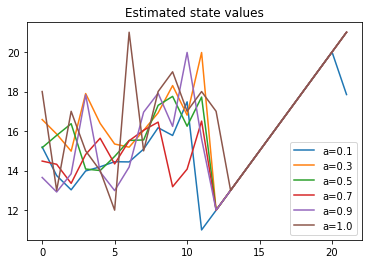

In [114]:
RL_analysis()